# Imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stat
import pylab 

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier ,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

# Importing dataset


Column information provided by UCI Repository

    1. Sample code number            id number
    2. Clump Thickness               1 - 10
    3. Uniformity of Cell Size       1 - 10
    4. Uniformity of Cell Shape      1 - 10
    5. Marginal Adhesion             1 - 10
    6. Single Epithelial Cell Size   1 - 10
    7. Bare Nuclei                   1 - 10
    8. Bland Chromatin               1 - 10
    9. Normal Nucleoli               1 - 10
    10. Mitoses                       1 - 10
    11. Class:                        (2 for benign, 4 for malignant)

More info on the dataset can be found [here](https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.names)

In [4]:
col_names=['Sample_code_number', 'Clump_Thickness','Uniformity_of_Cell_Size', 'Uniformity_of_Cell_Shape', 'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei','Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', names=col_names)

In [5]:
data.shape

(699, 11)

In [6]:
data.head()

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


# EDA and FE

Obviously the sample code number should be dropped, since it is of no significance

In [7]:
data.drop(columns=['Sample_code_number'], inplace = True)

## Checking for nulls

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump_Thickness              699 non-null    int64 
 1   Uniformity_of_Cell_Size      699 non-null    int64 
 2   Uniformity_of_Cell_Shape     699 non-null    int64 
 3   Marginal_Adhesion            699 non-null    int64 
 4   Single_Epithelial_Cell_Size  699 non-null    int64 
 5   Bare_Nuclei                  699 non-null    object
 6   Bland_Chromatin              699 non-null    int64 
 7   Normal_Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


There are no nulls - at least at  first glance, but the datatypes are inconsistnent with our first data.head() call.

In [9]:
data.Bare_Nuclei.unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

We can see that there are some '?" values. We would've picked on that sooner, had we read the dataset .names file

In [10]:
data.loc[data['Bare_Nuclei'] == '?']

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
23,8,4,5,1,2,?,7,3,1,4
40,6,6,6,9,6,?,7,8,1,2
139,1,1,1,1,1,?,2,1,1,2
145,1,1,3,1,2,?,2,1,1,2
158,1,1,2,1,3,?,1,1,1,2
164,5,1,1,1,2,?,3,1,1,2
235,3,1,4,1,2,?,3,1,1,2
249,3,1,1,1,2,?,3,1,1,2
275,3,1,3,1,2,?,2,1,1,2
292,8,8,8,1,2,?,6,10,1,4


In [11]:
data = data.replace('?',np.nan).dropna(axis=0)
data['Bare_Nuclei'] = data['Bare_Nuclei'].astype('int64') 
data.shape

(683, 10)

In [12]:
data.describe()

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# Replace the target columns values with 0 and 1 

In [13]:
data.Class = data.Class.replace(2,0)
data.Class = data.Class.replace(4,1)


## Data plotting

<AxesSubplot:>

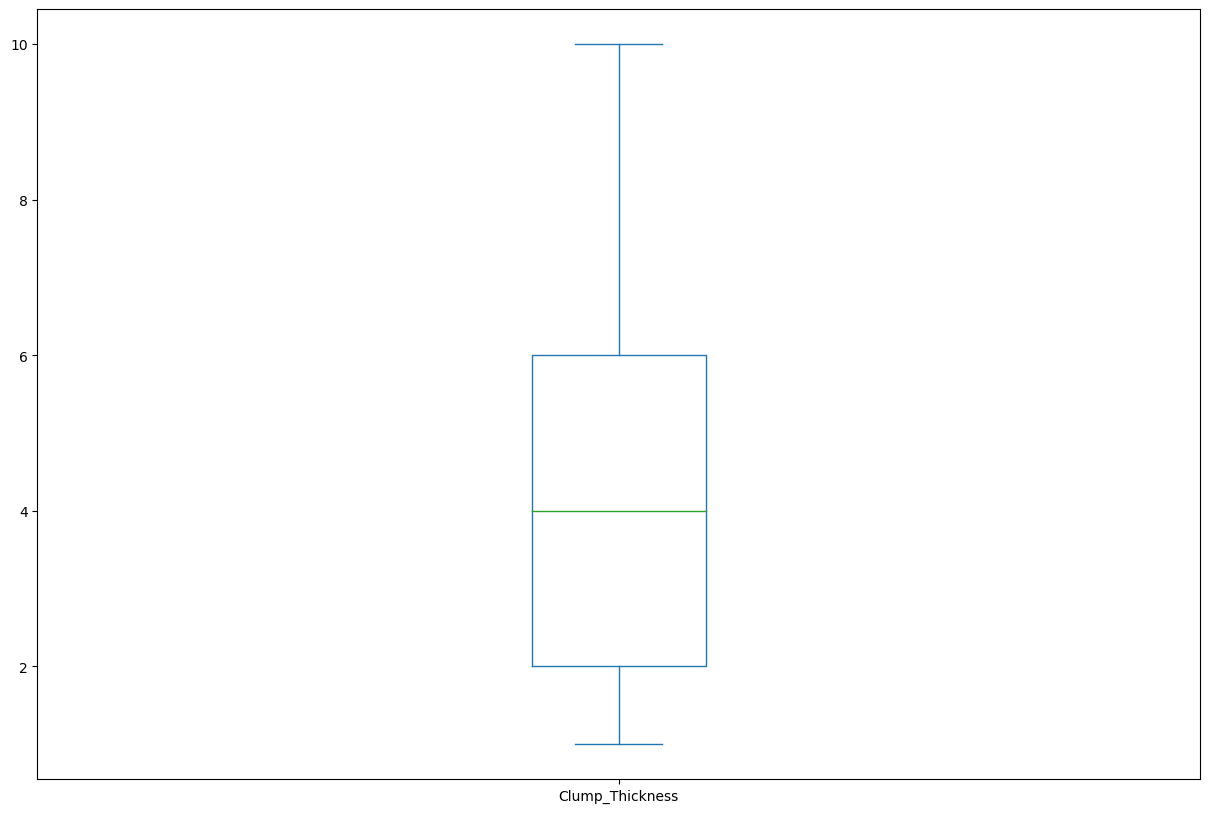

In [14]:
plt.figure(figsize=(15,10))
data['Clump_Thickness'].plot.box()

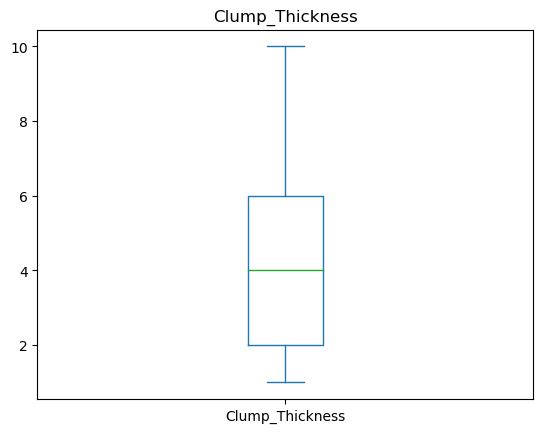

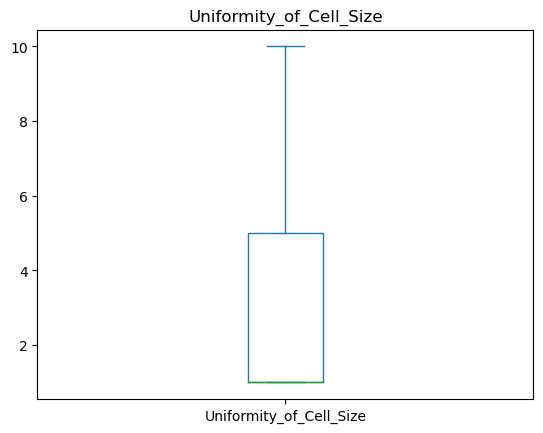

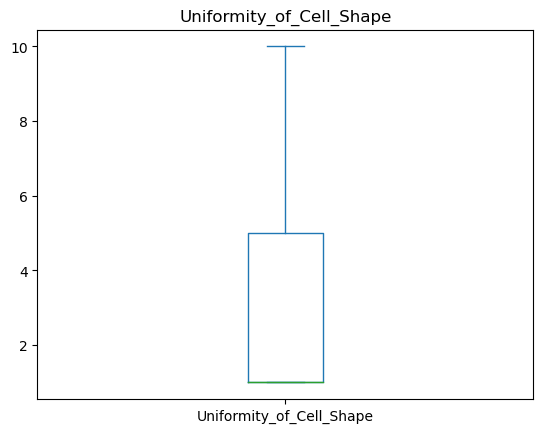

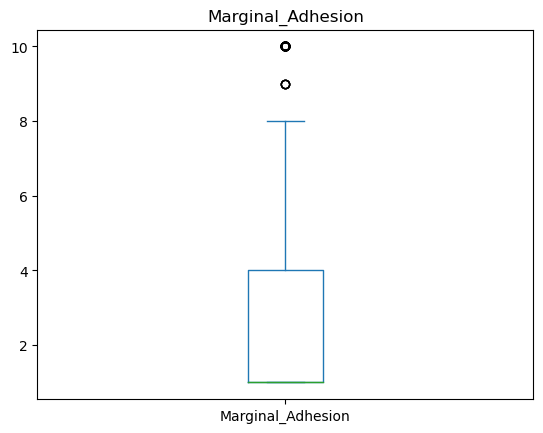

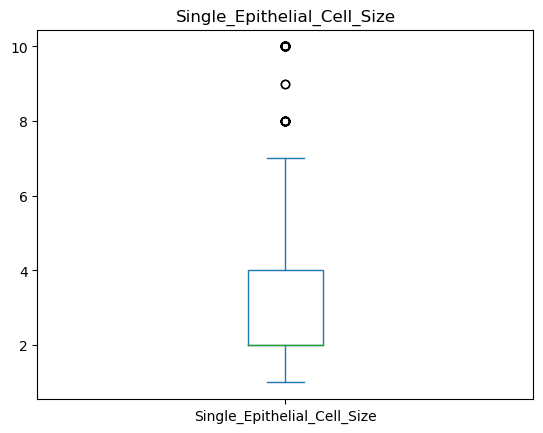

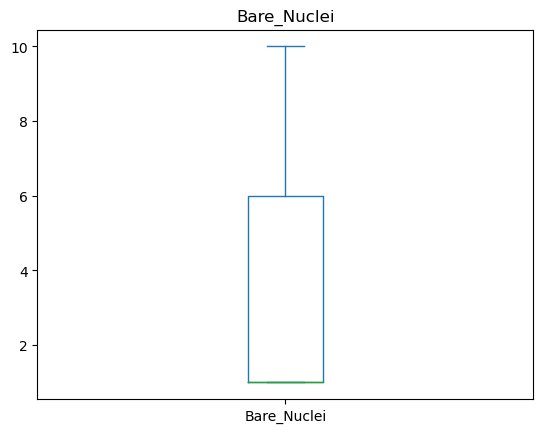

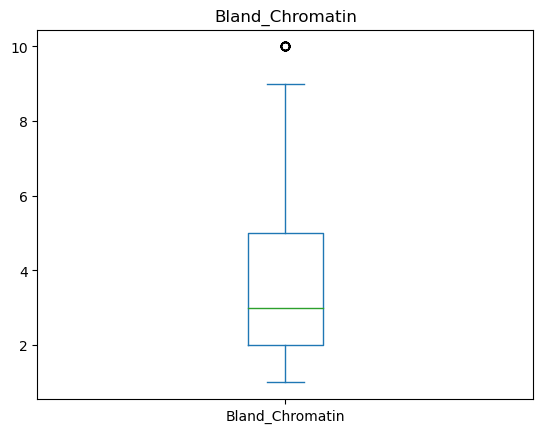

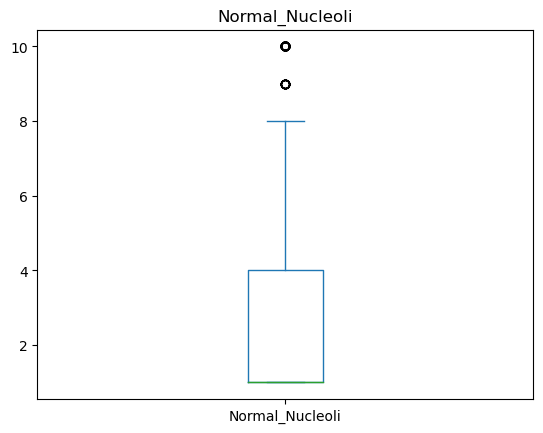

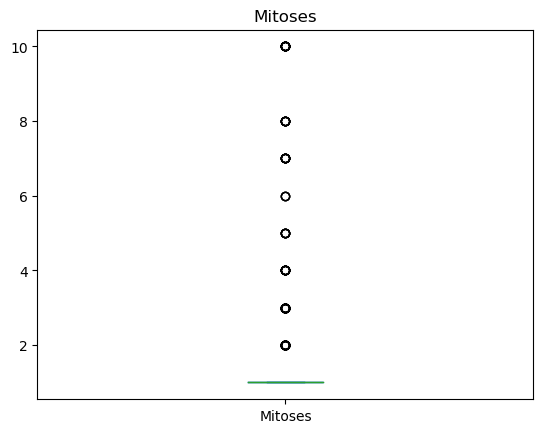

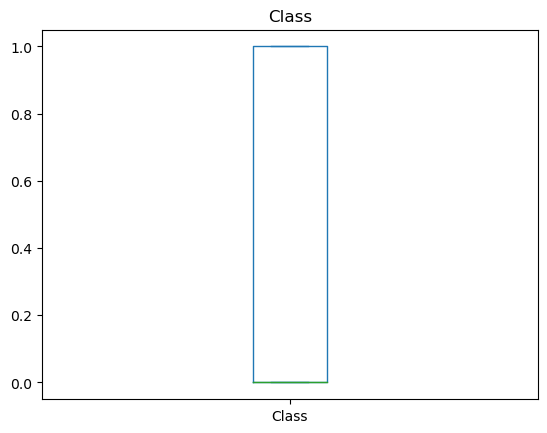

In [15]:
for i, col in enumerate(data.columns):
    data[col].plot.box(fig=plt.figure(i))
    plt.title(col)
plt.show()



There are some outlieres in the data, but I will leave them for now

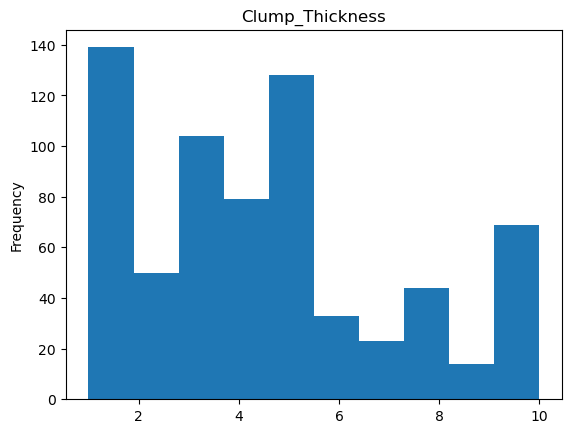

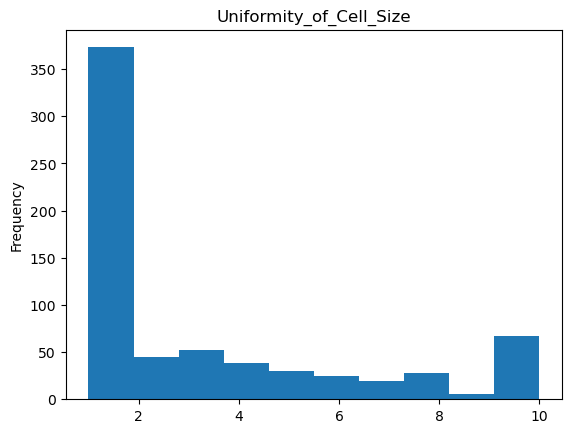

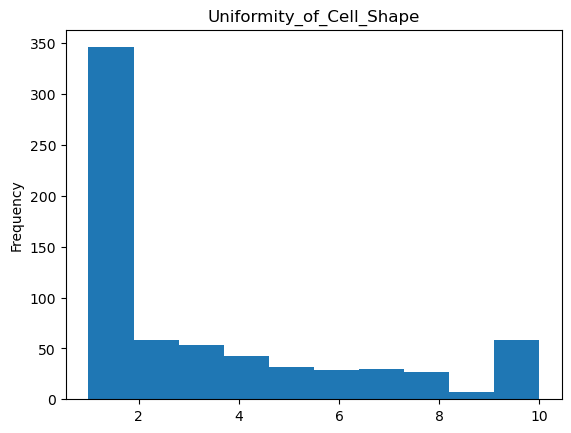

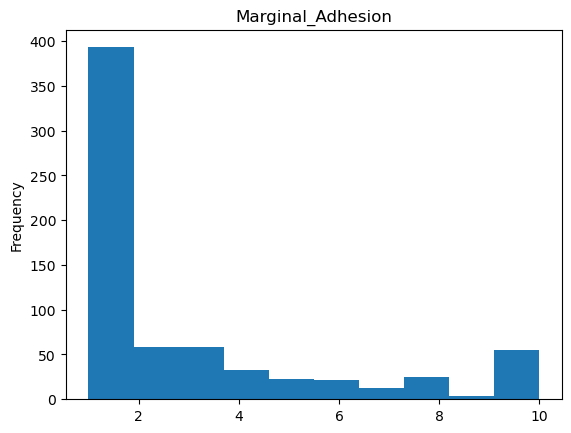

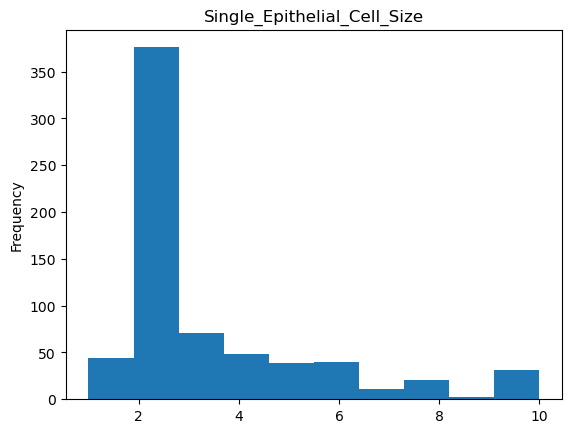

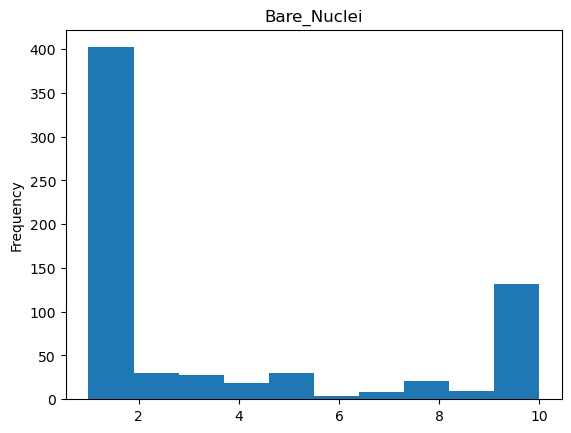

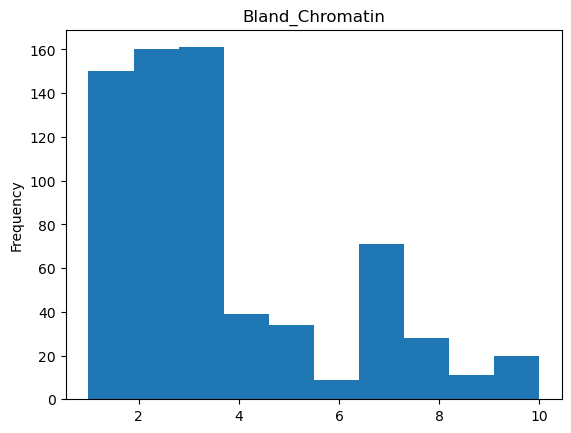

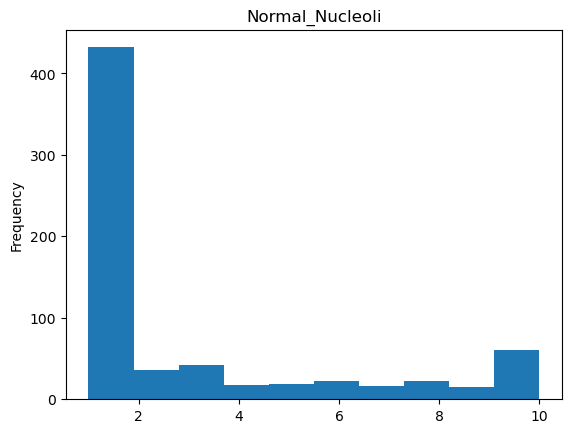

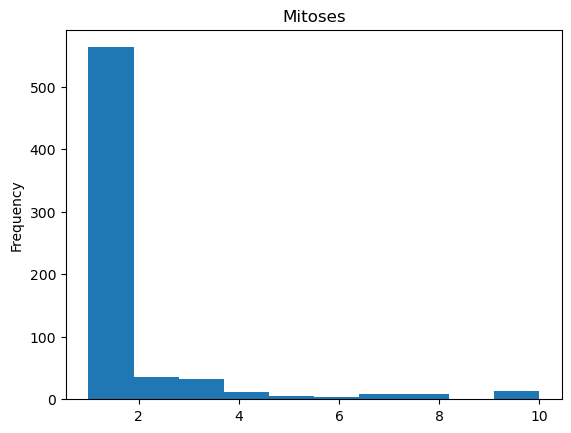

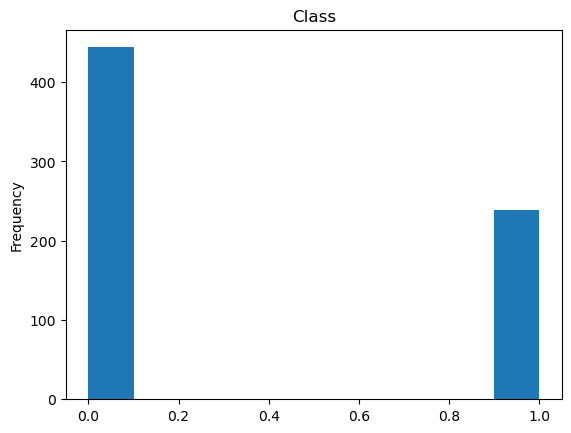

In [16]:
for i, col in enumerate(data.columns):
    data[col].plot.hist(fig=plt.figure(i))
    plt.title(col)
plt.show()



Data seems to be unbalanced in a lot of cases, following nearly an exponential distribution with a right skew.

<AxesSubplot:>

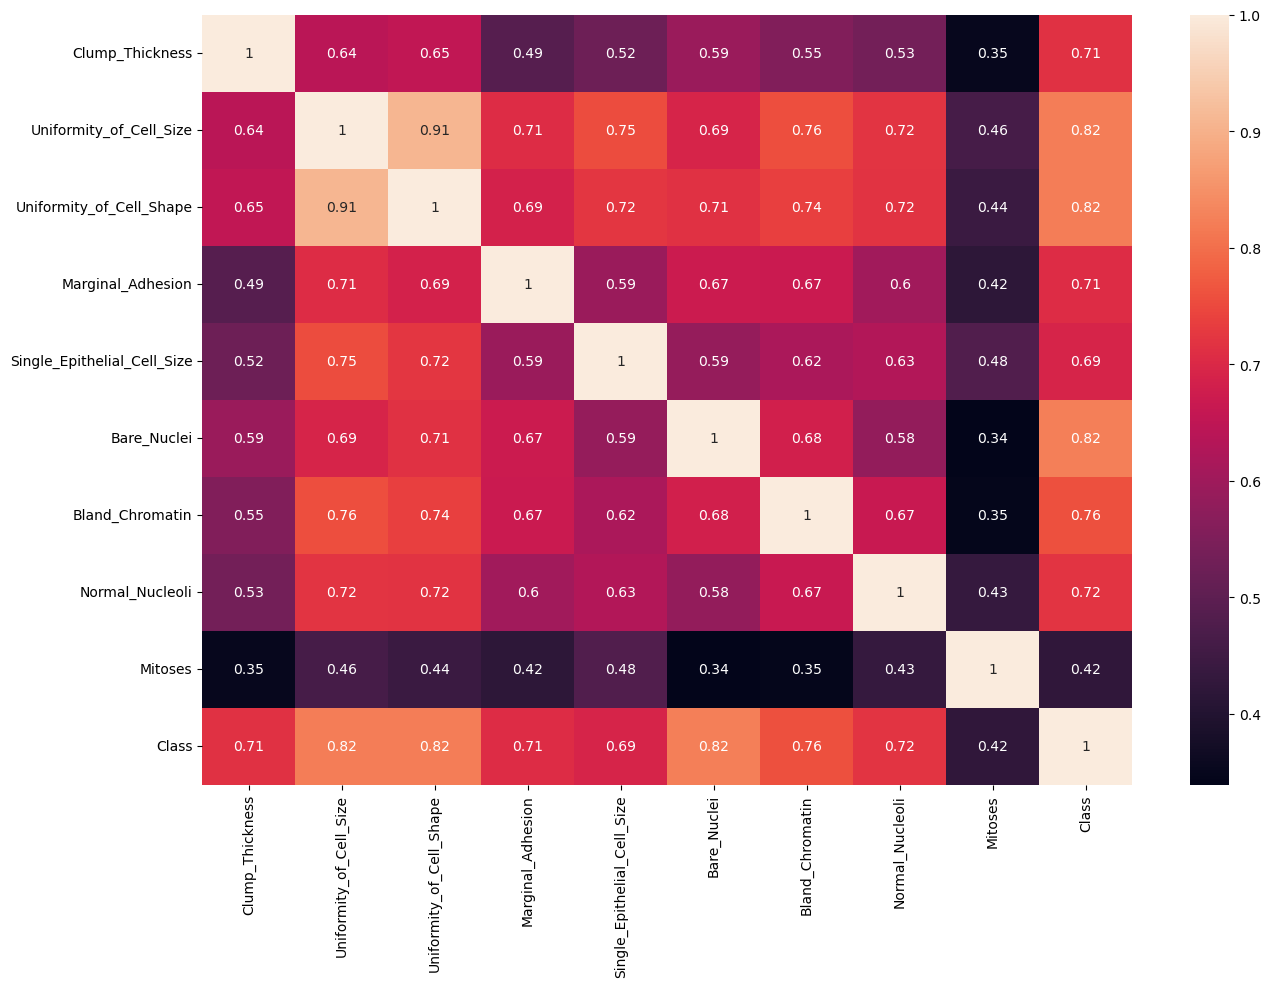

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(data=data.corr(), annot=True)

Some variables are higly correlated with each other, might want to use Boosting or Trees.

# Splitting

In [18]:
X = data.copy().drop('Class',axis=1)
y = data.Class

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state = 1, stratify=y)

# Modeling

In [19]:
model = SVC()
model.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy_score(pred, y_test)

0.9590643274853801

In [20]:
pd.DataFrame(data={'Accuracy' : accuracy_score(pred, y_test),
            'Recall' : recall_score(pred, y_test),
            'Precision' : precision_score(pred, y_test),
             'F1 Score' : f1_score(pred, y_test) 
},index=[0])

,Accuracy,Recall,Precision,F1 Score
0,0.959064,0.920635,0.966667,0.943089
